# Yulu Business Case
### - by Akhilesh Jangid

### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [1]:
import pandas as pd, numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from scipy.stats import ttest_ind
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2_contingency
from scipy.stats import probplot
from scipy.stats import levene
from scipy.stats import kruskal

In [4]:
df = pd.read_csv('Yulu.csv')

# 1). Performing EDA

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [7]:
df.size

130632

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# Changing the data type of category columns from int to string
category_col = ['season', 'holiday', 'workingday', 'weather']
df[category_col] = df[category_col].astype(str)

df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
# Checking if the data types are changed or not !
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [11]:
# Getting a brief overview of data.
df.describe(include = 'all')

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_6410/2470671838.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [12]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
# minimum datetime and maximum datetime
print('Data Starting Date : ' , df['datetime'].min()) 
print('Data Ending Date : ' , df['datetime'].max())

# number of unique values in each categorical columns
df[category_col].melt().groupby(['variable', 'value'])[['value']].count()

Data Starting Date :  2011-01-01 00:00:00
Data Ending Date :  2012-12-19 23:00:00


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

### Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

## Univariet Analysis:- 

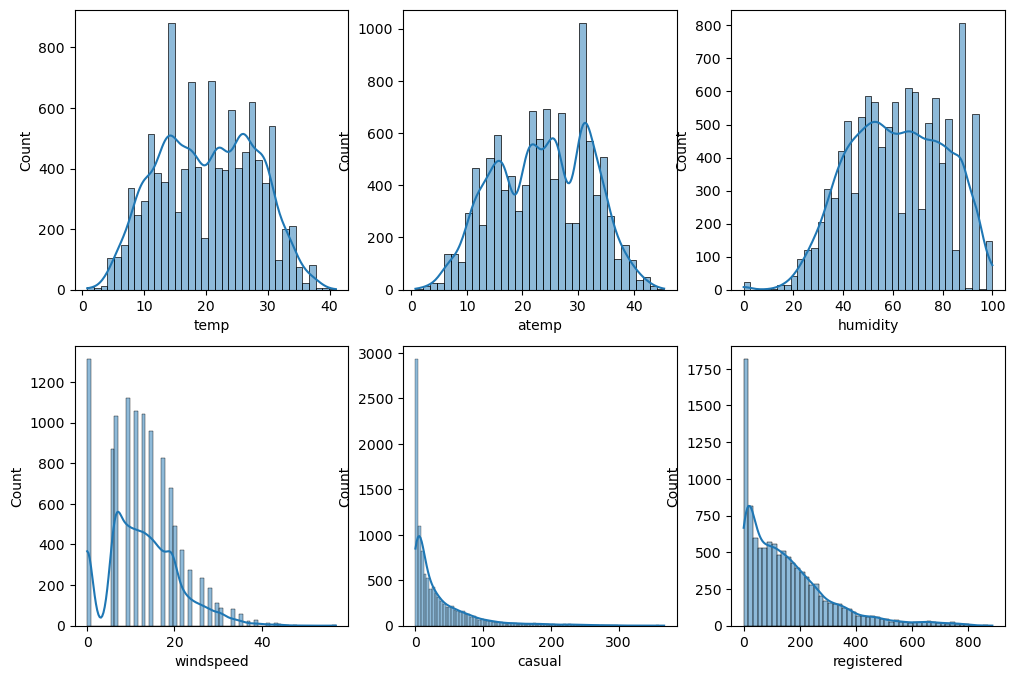

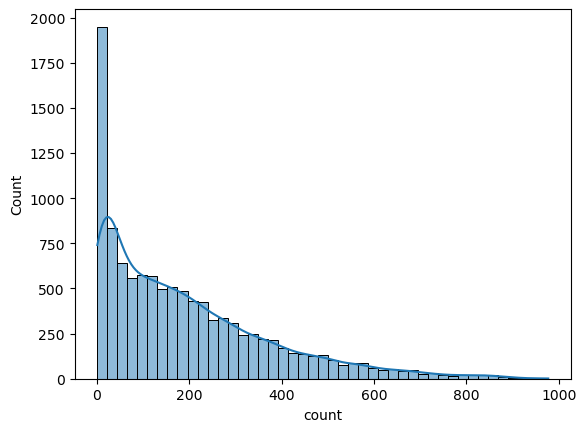

In [14]:
# understanding the distribution for numerical variables

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0

for row in range(2):
    for col in range(3):
    
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
plt.show()

sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

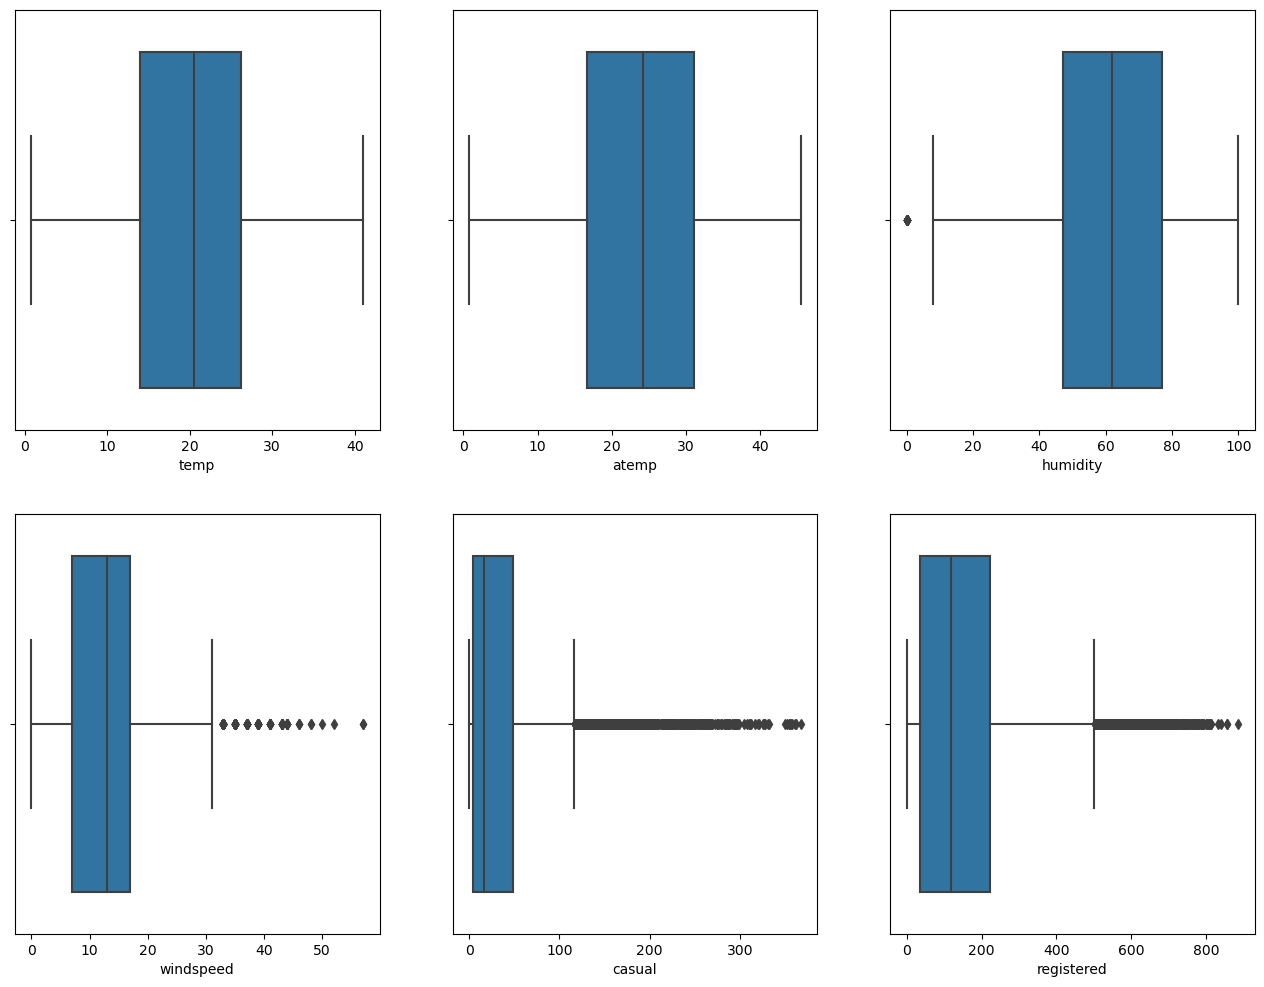

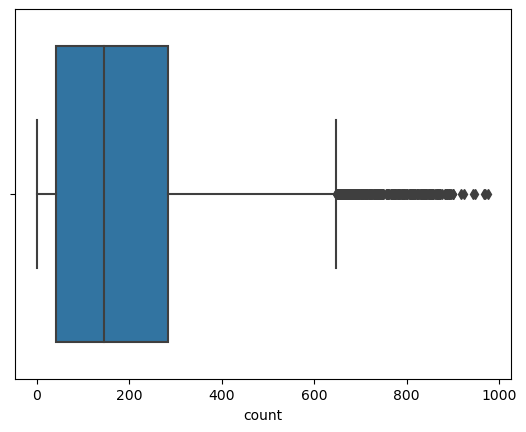

In [15]:
# Box plot for outlier detection :- 

fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16,12))
index = 0 
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax = axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

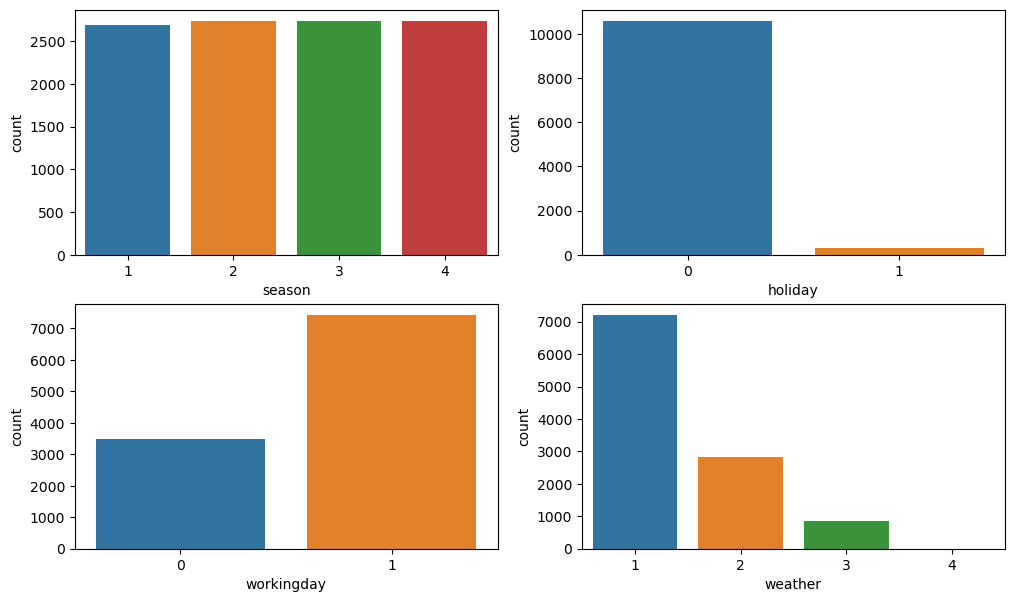

In [16]:
# countplot of each categorical column

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=category_col[index], ax=axis[row, col])
        index += 1
plt.show()

## Bi-variate Analysis

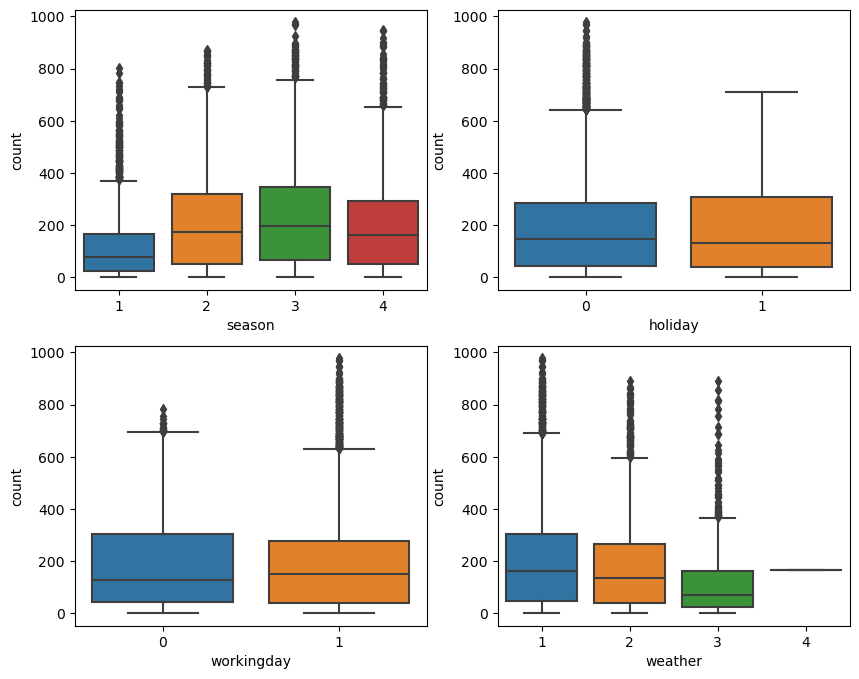

In [17]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x = category_col[index], y='count', ax=axis[row,col])
        index += 1
plt.show()

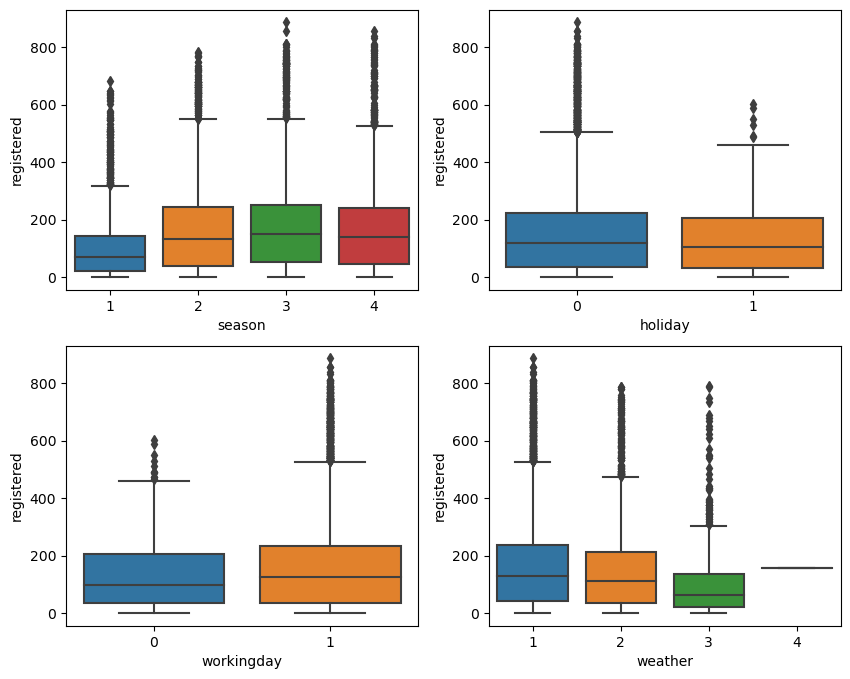

In [18]:
# plotting categorical variables againt Registered users using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x = category_col[index], y='registered', ax=axis[row,col])
        index += 1
plt.show()

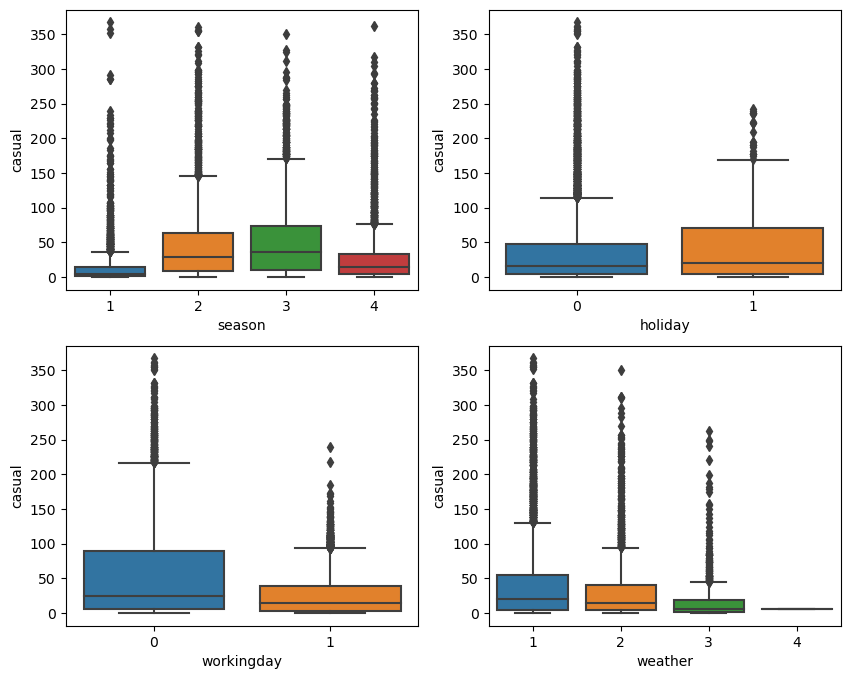

In [19]:
# plotting categorical variables againt Casual users using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x = category_col[index], y='casual', ax=axis[row,col])
        index += 1
plt.show()

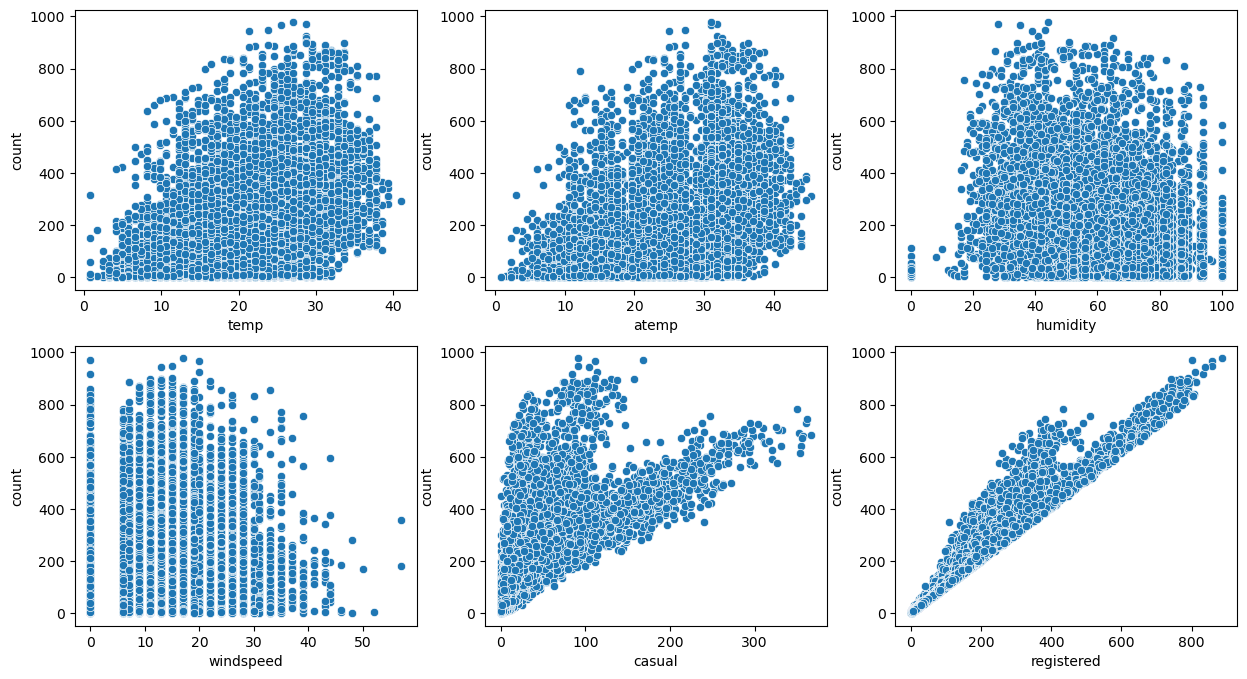

In [20]:
# plotting numerical variables againt count using scatterplot.

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count',
        ax=axis[row, col])
        index += 1
plt.show()

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_6410/3544557171.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


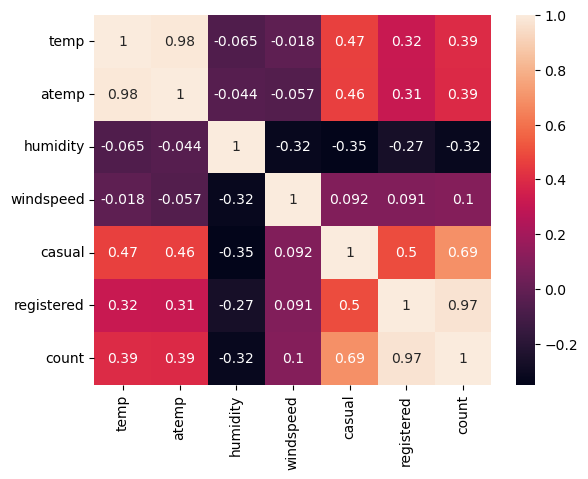

In [21]:
# understanding the correlation between numerical variables
sns.heatmap(df.corr(), annot=True)
plt.show()

# 2). Hypothesis Testing:

### 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented :

In [22]:
'''Before conducting the two-sample T-Test we need to find if the given data groups have
the same variance. If the ratio of the larger data groups to the small data group is less
than 4:1 then we can consider that the given data groups have equal variance.'''

data_group1 = df[df['workingday'] == '0']['count'].values
data_group2 = df[df['workingday'] == '1']['count'].values

print(round(np.var(data_group1),2), round(np.var(data_group2)),2)
print("Ratio of Variance", np.var(data_group2)// np.var(data_group1))

30171.35 34041 2
Ratio of Variance 1.0


In [23]:
# Null Hypothesis: Working day has no effect on the number of cycles being rented.
# Alternate Hypothesis: Working day has effect on the number of cycles being rented.
# Significance level (alpha): 0.05

alpha = 0.05
test_Stat, p_val = ttest_ind(a = data_group1, b = data_group2)
print("P Value : ", p_val)
if p_val <= alpha:
    print("Reject Null Hypothesis and conclude, Working day has effect on the number of cycles being rented.")
else:
    print("Cannot Reject Null Hypothesis and conclude, Working day has no effect on the number of cycles being rented.")

P Value :  0.22644804226361348
Cannot Reject Null Hypothesis and conclude, Working day has no effect on the number of cycles being rented.


### ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. Season

### 1. check if No. of cycles rented is similar or different in different weather
Annova Test is the opt test for to conclude more than 2 categories are statistically different. But to perform annova test we have to check assumptions like normality test or variance test to check normality.

### Normality check - QQ Plot for weather categories

In [37]:
W1 = df[df["weather"]== '1']["count"].values 
W2 = df[df["weather"]== '2']["count"].values 
W3 = df[df["weather"]== '3']["count"].values 
W4 = df[df["weather"]== '4']["count"].values

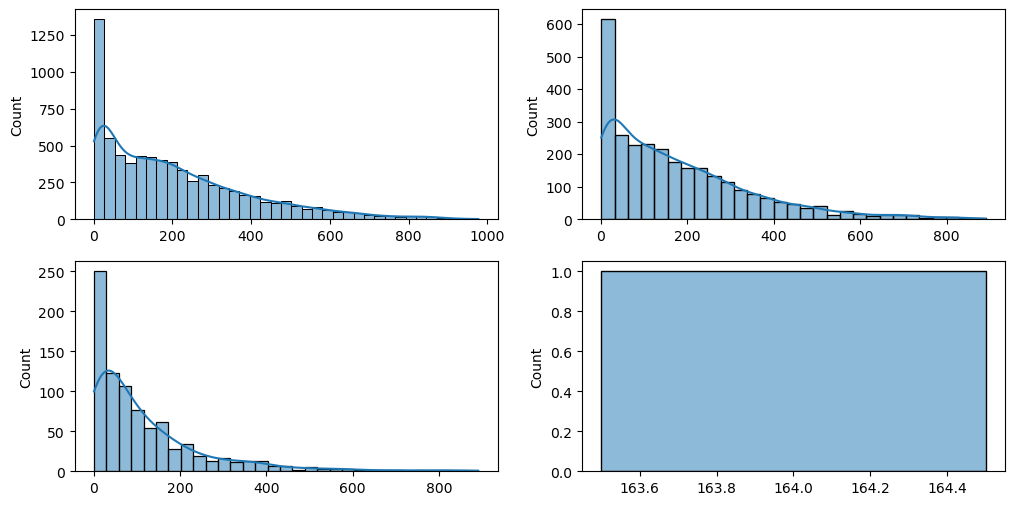

In [45]:
# Distribution check
group1 = [W1, W2, W3, W4]
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(group1[index], ax=axis[row, col], kde=True)
        index += 1
plt.show()

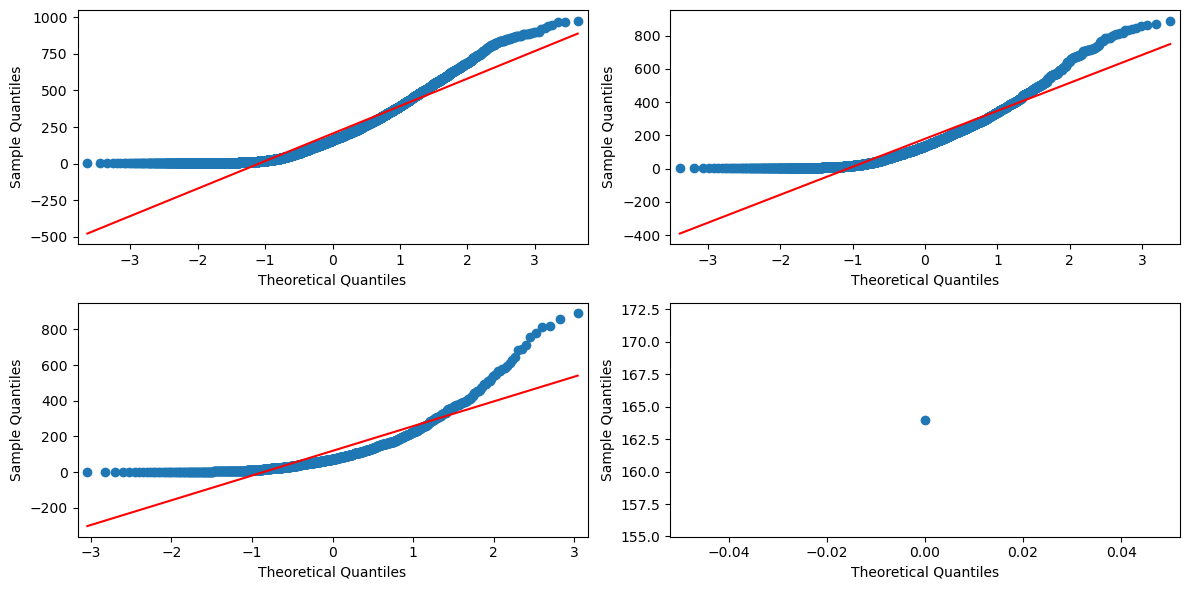

In [52]:
# QQ plot
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
index = 0

for row in range(2):
    for col in range(2):
        ax = axis[row, col]  # Get the axis for each subplot
        qqplot(group1[index], line="s", ax=ax)  # Draw Q-Q plot on the specified axis
        index += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Variance Check - Levene's Test


In [55]:
#H0 : Variances are approximately equal 
#H1 : Variances are not equal

statistic, p_value = levene(W1, W2, W3,W4) 
print("Levene's Test Statistic:", statistic) 
print("P-Value:", p_value)

alpha = 0.05 #Considering 95% confidence interval
if p_value < alpha:
    print("Variances are not equal (reject H0)")
else:
    print("Variances are approximately equal (failed to reject H0)")

Levene's Test Statistic: 54.85106195954556
P-Value: 3.504937946833238e-35
Variances are not equal (reject H0)


#### As both normality and variance test fails, ANOVA test won't be the best choice for compare the groups. 
#### We have to select Non Parametric Hypothesis Tests to check the relation between the categories 
#### Non-parametric hypothesis test that compares two or more independent groups is Kruskal-Wallis test.

### krushkal Test

In [59]:
#H0: Number of cycles rented is similar in different weather. 
#H1: Number of cycles rented is different in different weather.
alpha = 0.05 #Considering 95% confidence interval
kruskal_stat, p_value = kruskal(W1, W2, W3,W4) 

print("Kruskal Test Statistic:", statistic) 
print("P-Value:", p_value)
if p_value < alpha:
    print("Number of cycles rented is different in different weather (reject H0)")
else:
    print("Number of cycles rented is similar in different weather. (failed to reject H0)")

Kruskal Test Statistic: 54.85106195954556
P-Value: 3.501611300708679e-44
Number of cycles rented is different in different weather (reject H0)


### Number of cycles rented is similar or different in different season

In [61]:
S1 = df[df["season"]=='1']["count"].values 
S2 = df[df["season"]=='2']["count"].values 
S3 = df[df["season"]=='3']["count"].values 
S4 = df[df["season"]=='4']["count"].values

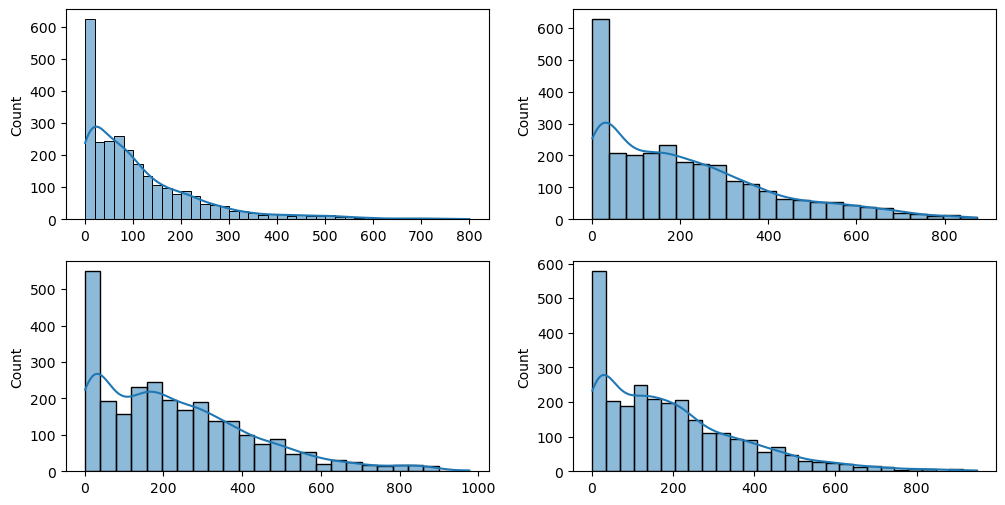

In [62]:
group2 = [S1,S2,S3,S4]
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(group2[index], ax=axis[row, col], kde=True)
        index += 1
plt.show()

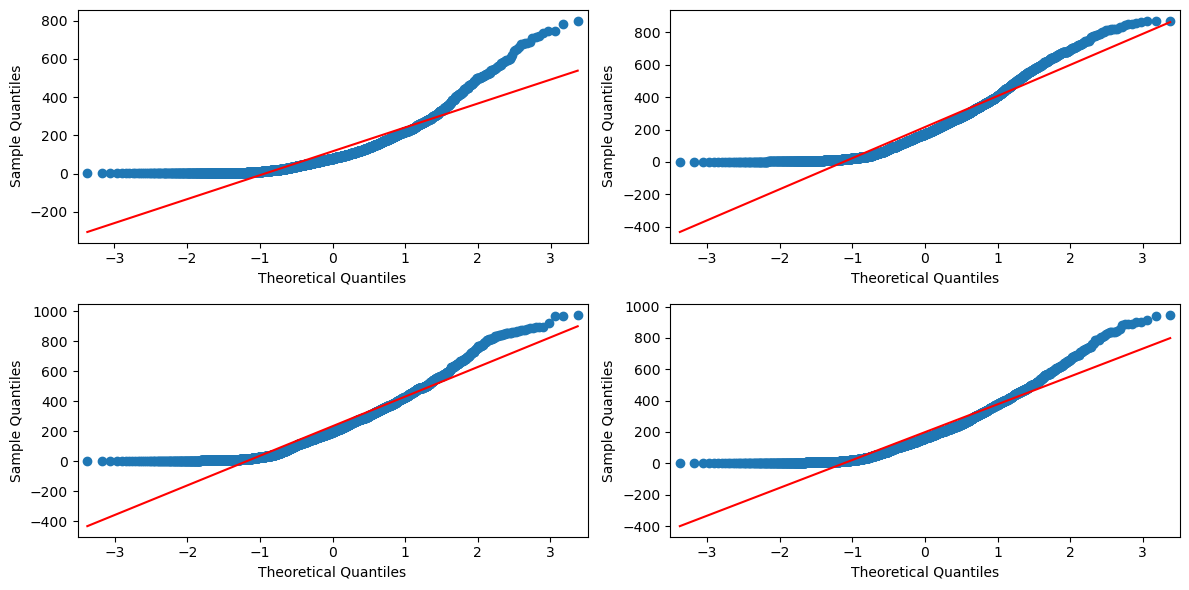

In [63]:
# QQ plot
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
index = 0

for row in range(2):
    for col in range(2):
        ax = axis[row, col]  # Get the axis for each subplot
        qqplot(group2[index], line="s", ax=ax)  # Draw Q-Q plot on the specified axis
        index += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Variance Check - Levene's Test


In [64]:
#H0 : Variances are approximately equal 
#H1 : Variances are not equal
statistic, p_value = levene(S1, S2, S3, S4) 
print("Levene's Test Statistic:", statistic) 
print("P-Value:", p_value)
alpha = 0.05 #Considering 95% confidence interval
if p_value < alpha:
    print("Variances are not equal (reject H0)")
else:
    print("Variances are approximately equal (failed to reject H0)")

Levene's Test Statistic: 187.7706624026276
P-Value: 1.0147116860043298e-118
Variances are not equal (reject H0)


#### As both normality and variance test fails, ANOVA test won't be the best choice for compare the groups. 
#### We have to select Non Parametric Hypothesis Tests to check the relation between the categories 
#### Non-parametric hypothesis test that compares two or more independent groups is Kruskal-Wallis test.

In [65]:
## Kruskal Test 
#H0: Number of cycles rented is similar in different seasons. 
#H1: Number of cycles rented is different in different seasons.
alpha = 0.05 #Considering 95% confidence interval
kruskal_stat, p_value = kruskal(S1, S2, S3, S4) 
print("Kruskal Test Statistic:", statistic) 
print("P-Value:", p_value)
if p_value < alpha:
    print("Number of cycles rented is different in different seasons (reject H0)")
else:
    print("Number of cycles rented is similar in different seasons. (failed to reject H0)")

Kruskal Test Statistic: 187.7706624026276
P-Value: 2.479008372608633e-151
Number of cycles rented is different in different seasons (reject H0)


### Chi-square test to check if Weather is dependent on the season.

In [28]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [29]:
# Null Hypothesis (H0): Weather is independent of the season.
# Alternate Hypothesis (H1): Weather is not independent of the season.
# Significance level (alpha): 0.05

alpha = 0.05

test_stat, p_val, dof, expected_val = chi2_contingency(data_table)
print("Test Statistic : ", test_stat)
print("P_Value : ", p_val)
print("Degree of freedom : ", dof)
print("Expected Freq. : ", expected_val)
print()

if p_val < alpha:
    print("Rejcte Null Hypothesis and conclude weather is dependent on season.")
else:
    print("Can't rejcte Null Hypothesis and conclude weather is independent on season.")

Test Statistic :  49.158655596893624
P_Value :  1.549925073686492e-07
Degree of freedom :  9
Expected Freq. :  [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]

Rejcte Null Hypothesis and conclude weather is dependent on season.


# Insights
1)  In summer and fall seasons more bikes are rented as compared to other seasons.
2)  Whenever its a holiday more bikes are rented.
3) It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
4)  Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
5)  Whenever the humidity is less than 20, number of bikes rented is very very low.
6)  Whenever the temperature is less than 10, number of bikes rented is less.
7) Whenever the windspeed is greater than 35, number of bikes rented is less.

# Recommendations

1) In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
2)  With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
3) In very low humid days, company should have less bikes in the stock to be rented.
4) Whenever temperature is less than 10 or in very cold days, company should have less bikes.
5) Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.